# Can you visually explain the relationship between crown height and/or crown width and whether the avalanche hit the rail?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

avyobs= pd.read_pickle('/Users/ashleyshell/Documents/GitHub.nosync/avalanche-alley/data-prep/pkl/avy_obs.pkl')

In [2]:
pd.set_option('display.max_columns', None)
avyobs

,avpathid,avobsdate,avobstime,avobserverid,avtype,avtriggertyp,avtrigger,avrelativesize,avdestructivesize,avinterface,sz_vert,sz_horiz,sz_avgslope,sz_elev_m,sz_aspect,term_elev_m,av_vert_m,crown_width_m,ch_max_cm,ch_min_cm,ch_diff_cm,term_longpath,term_shortPath,term_detail,term_moist,deb_rail,deb_rail_w,deb_rail_d,deb_hwy,deb_hwy_w,deb_hwy_d,avcomment,edcr_user,edcr_time,edcr_ip,eded_user,eded_time,eded_ip
avrid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,SHED10,2012-03-26,12:45:00,stein_01,WS,5.0,NL,R1,D1.5,O,B,R,0,0,NaN,0,0,0,0,0,0,TK,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,Wet slab released on SE aspect @ 5400 feet (16...,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN
2,PATH1163,2012-03-16,08:30:00,stein_01,U,5.0,NU,U,D2,U,U,U,0,0,NaN,0,0,0,0,0,0,TK,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,Wet debris ran 2/3 path in main path to 4700 f...,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN
3,CURLY,2012-03-16,08:34:00,stein_01,U,5.0,NU,U,D1,U,U,U,0,0,NaN,0,0,0,0,0,0,TR,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,Terminus at canyon floor elevation.\r\n\r\nDeb...,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN
4,SHED10,2012-03-10,14:50:00,stein_01,WL,5.0,NaN,R2,D1,I,M,R,0,0,NaN,0,0,0,0,0,0,TK,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,D1.5,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN
5,INFINITY,2012-03-10,14:54:00,stein_01,L,5.0,N,R2,D1,I,T,C,0,0,NaN,0,0,0,0,0,0,TK,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,D1.5- 1/2 Path.,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,SHED07W,2022-03-01,05:04:00,clark_01,SS,5.0,NC,R2,D2,I,T,L,38,2015,E,1760,255,0,0,0,0,TK,-,U,U,False,0.0,0.0,False,0.0,0.0,Slab not observed until March 17th during a sk...,Adam,2022-03-17 21:17:04,10.30.72.4,NaN,0000-00-00 00:00:00,NaN
505,AP1163H,2022-03-23,13:30:00,clark_01,WL,5.0,NU,R1,D1.5,O,T,U,0,1830,SW,1460,370,0,0,0,0,TR,-,U,W,False,0.0,0.0,False,0.0,0.0,NaN,Adam,2022-03-23 21:32:42,10.30.72.4,NaN,0000-00-00 00:00:00,NaN
506,SHED10,2022-03-23,13:30:00,clark_01,WL,5.0,N,R2,D2,O,T,C,40,2075,SE,1646,429,0,0,0,0,TK,-,U,W,False,0.0,0.0,False,0.0,0.0,Obs on Mar. 24th from Hwy,Adam,2022-03-28 16:30:35,10.30.72.4,NaN,0000-00-00 00:00:00,NaN


In [3]:
crown = avyobs.loc[:,('avpathid', 'crown_width_m','deb_rail')]
crown

,avpathid,crown_width_m,deb_rail
avrid,,,
1,SHED10,0,False
2,PATH1163,0,False
3,CURLY,0,False
4,SHED10,0,False
5,INFINITY,0,False
...,...,...,...
504,SHED07W,0,False
505,AP1163H,0,False
506,SHED10,0,False


In [4]:
highcrown = crown.loc[crown. deb_rail == True]
highcrown

,avpathid,crown_width_m,deb_rail
avrid,,,
39,SHED05,0,True
73,SHED05,0,True
89,SHED08,0,True
143,SHED08,60,True
221,SHED07E,60,True
233,SHED07W,360,True
257,SHED107,0,True
259,SHED07E,70,True
260,PATH1163,45,True


#### https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.nlargest.html

In [5]:
bigcrown = crown.nlargest(10, 'crown_width_m')
bigcrown

,avpathid,crown_width_m,deb_rail
avrid,,,
376,SHED07W,1972,False
234,GOATLICK,800,False
461,JAVA,650,False
468,SHED07W,500,True
10,SHED09,424,False
382,MCAMNF,365,False
291,AP1183,364,True
233,SHED07W,360,True
319,JAVA,320,False


<AxesSubplot:xlabel='avpathid', ylabel='crown_width_m'>

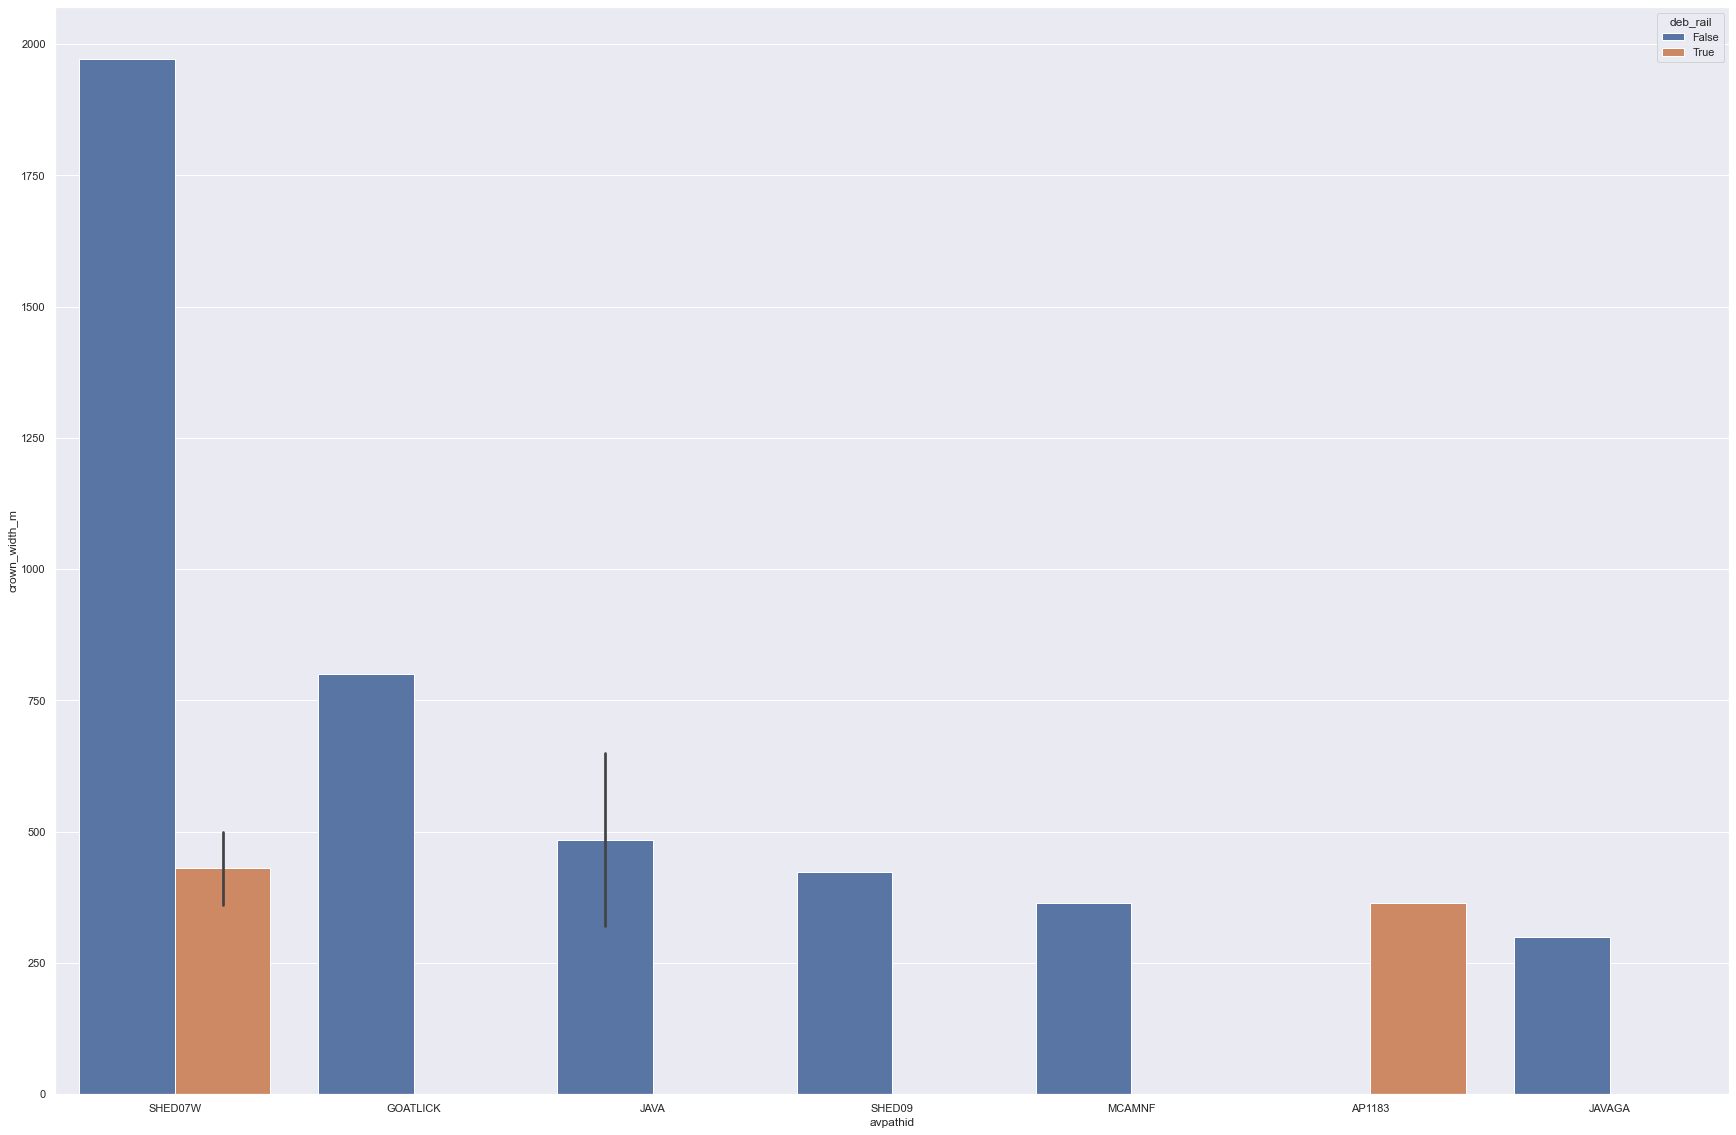

In [9]:
sns.set(rc={'figure.figsize':(30,20)})
sns.barplot(x = 'avpathid',
            y = 'crown_width_m',
            hue = 'deb_rail',
            data = bigcrown)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 [Text(0, 0, 'SHED10'),
  Text(1, 0, 'PATH1163'),
  Text(2, 0, 'CURLY'),
  Text(3, 0, 'INFINITY'),
  Text(4, 0, 'SECOND'),
  Text(5, 0, 'BURNOUT'),
  Text(6, 0, 'SHED09L'),
  Text(7, 0, 'SHED09'),
  Text(8, 0, 'SHED06'),
  Text(9, 0, 'SHED04D'),
  Text(10, 0, 'MSHLDS'),
  Text(11, 0, 'ELKFENCE'),
  Text(12, 0, 'TestSlope1'),
  Text(13, 0, 'SHED07W'),
  Text(14, 0, 'SHED07E'),
  Text(15, 0, 'SHED05'),
  Text(16, 0, 'JAVAGA'),
  Text(17, 0, 'JAVA'),
  Text(18, 0, 'SHED08'),
  Text(19, 0, 'TestSlope2'),
  Text(20, 0, 'SHED11'),
  Text(21, 0, 'GRIZZLY'),
  Text(22, 0, 'BROKEN'),
  Text(23, 0, 'JAKES'),
  Text(24, 0, 'FRYPAN'),
  Text(25, 0, 'GOATLICK'),
  Text(26, 0, 'SHED107'),
  Text(27, 0, 'SHED07'),
  Text(28, 0, 'UMBRELLA'),
  Text(29, 0, 'IBEAM'),
  Text(30, 0, 'LARRY')

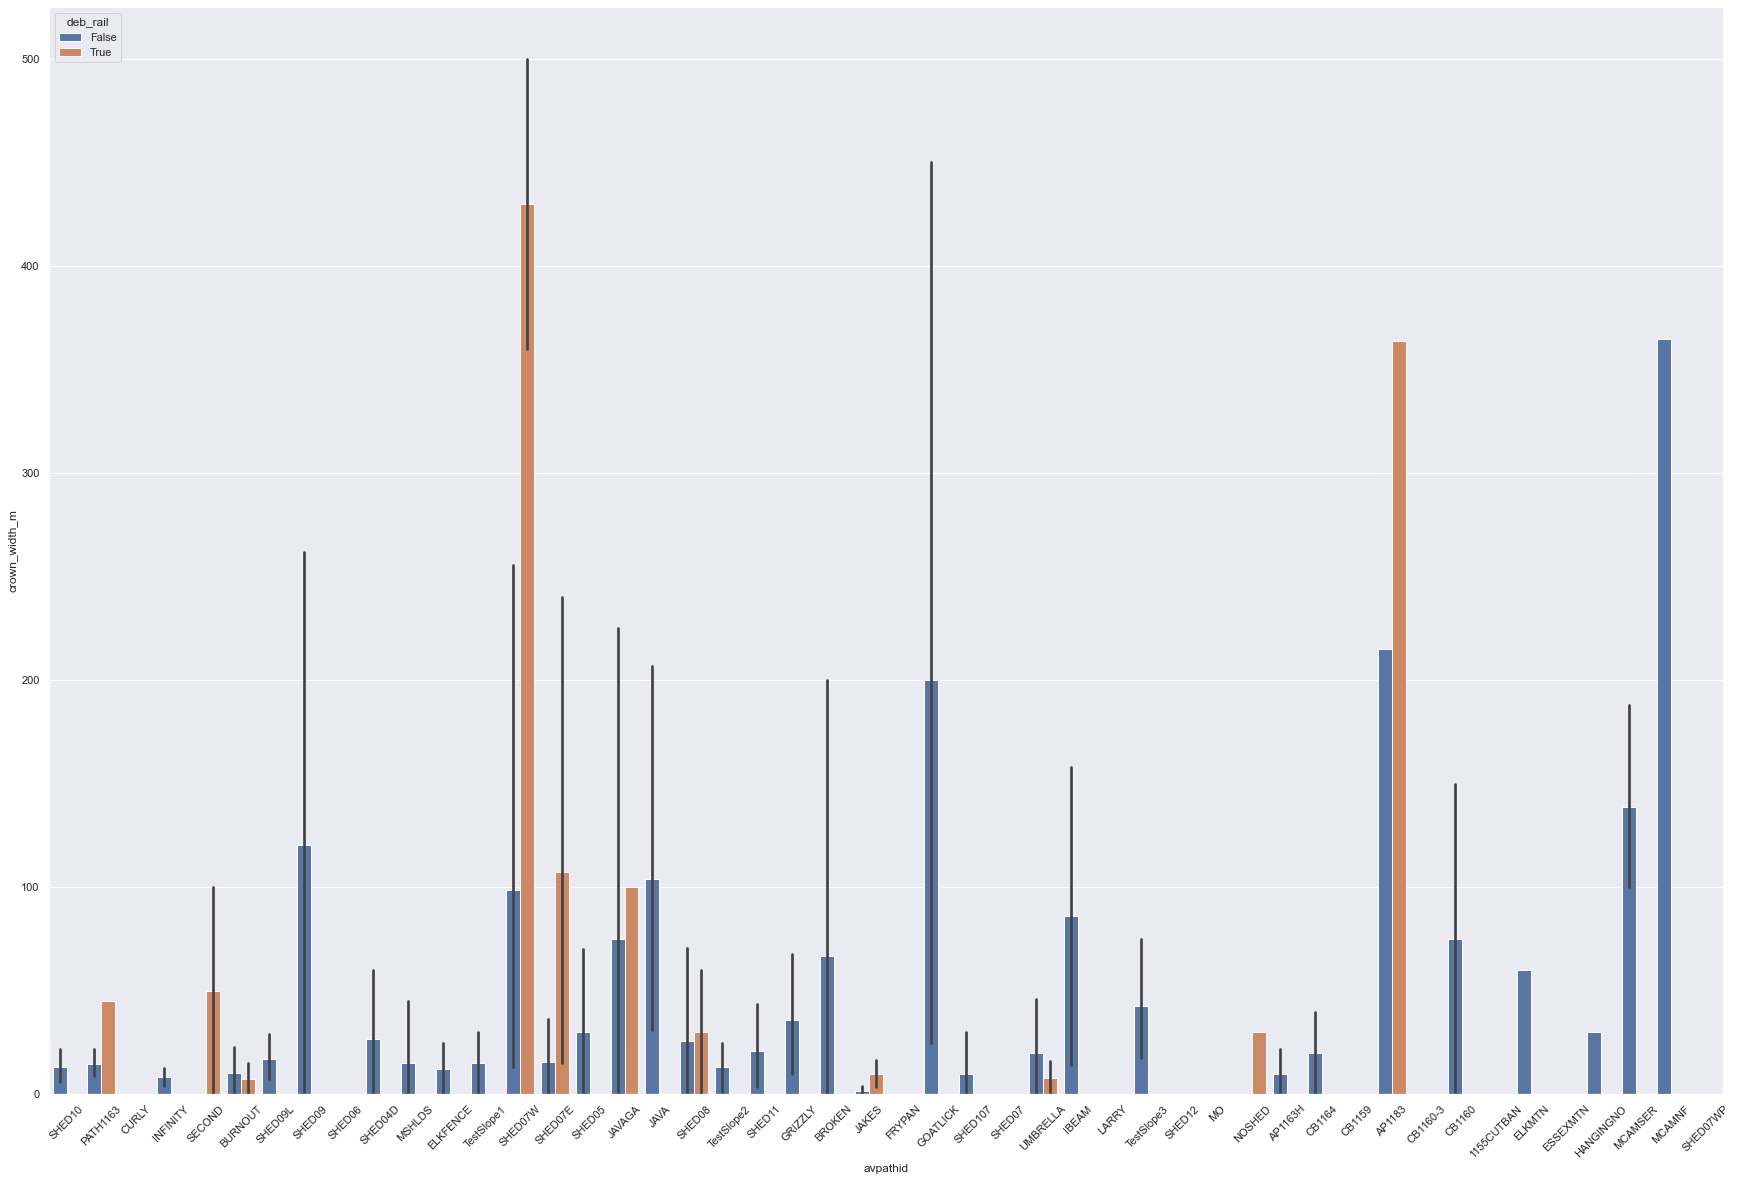

In [8]:
sns.set(rc={'figure.figsize':(30,20)})
sns.barplot(x = 'avpathid',
            y = 'crown_width_m',
            hue = 'deb_rail',
            data = crown)
plt.xticks(rotation=45)